# Titanic Dataset 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('titanic_train.csv')
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df=pd.DataFrame(data=ds)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

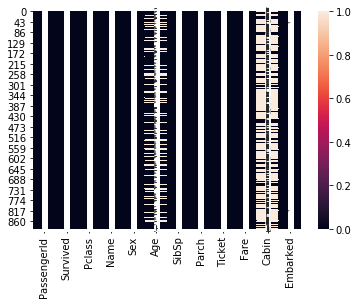

In [9]:
#Lets check whether the null values are present in the dataset or not using heatmap

sns.heatmap(df.isnull(), annot=True)
plt.show()

In [10]:
#lets check the null values without using visualization

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Dropping the cabin column as it contains High number of null values.

df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
#imputer works for numerical data such as Age, Cabin & Embarked

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="mean")
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1, 1))

#handling null data/value or imputing null
imp=SimpleImputer(strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1, 1))

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


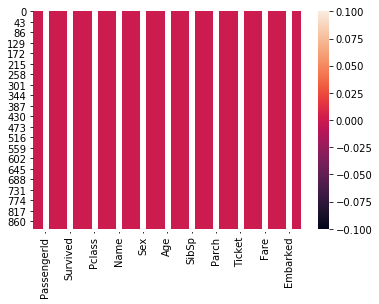

In [13]:
#Lets check whether the null values in the dataset after implementing Simple Imputer Streategy

sns.heatmap(df.isnull(), annot=True)
plt.show()

In [14]:
#lets check the null values without using visualization (after implementing Simple Imputer Streategy)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
#Now lets check the Correlation factor

dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


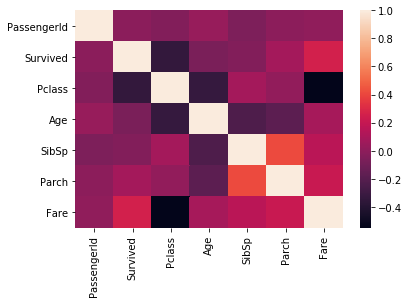

In [17]:
#Now lets check the Correlation factor with visualization

sns.heatmap(dfcor)

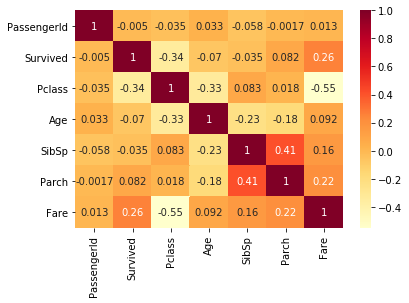

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor, cmap='YlOrRd', annot=True)

In [19]:
#Now dropping the  "Name", "PassengerId" & "Ticket" columns from the dataset as they do not contribute in building the model
df=df.drop(["Name", "PassengerId", "Ticket"], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


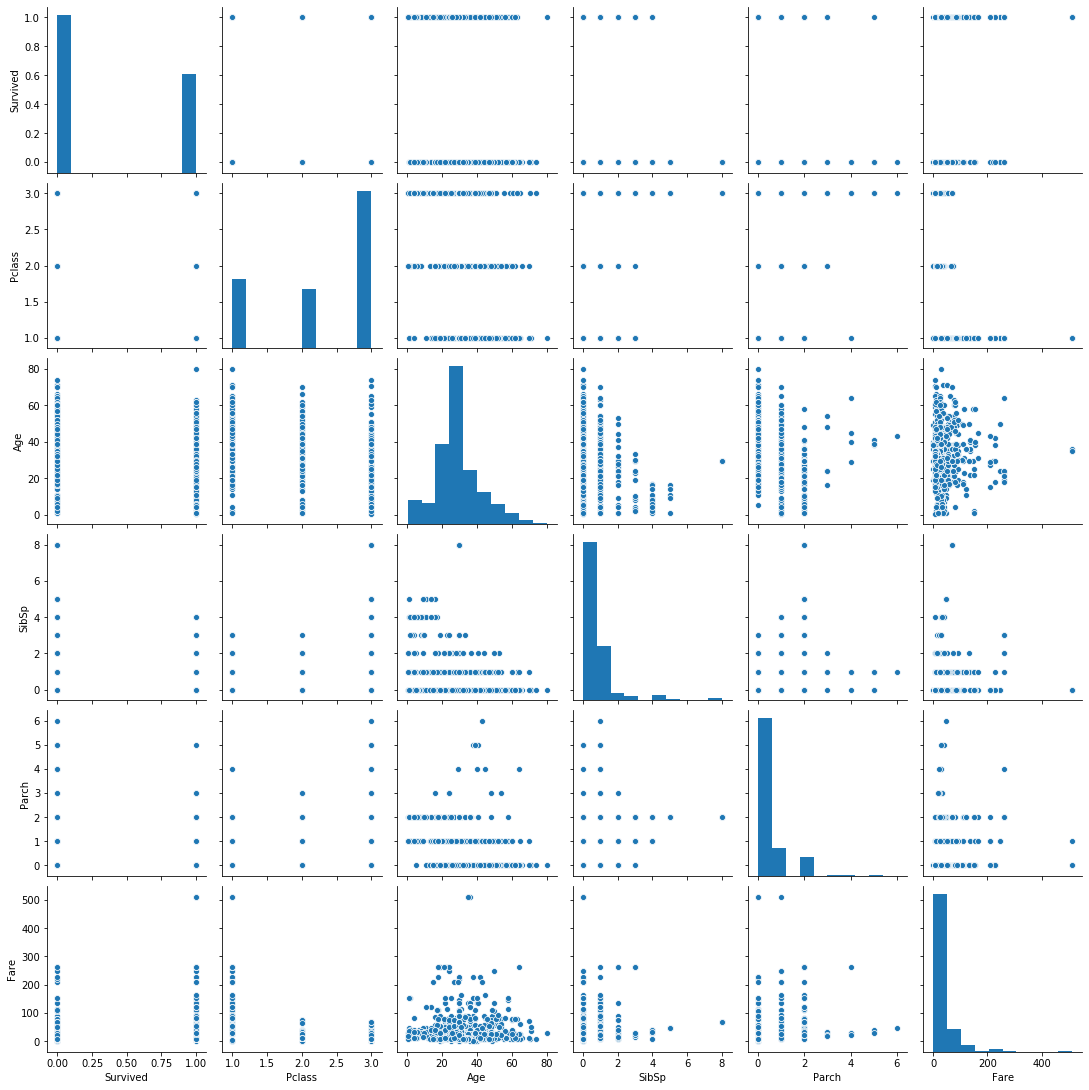

In [20]:
#lets check pairplot using seaborn library

import seaborn as sns
sns.pairplot(df)
plt.show()

In [21]:
# Import label encoder 
# Now lets replace the categorical values (alphabetic values) to numeric values using Label Encoder
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Embarked'. 
df['Embarked']= label_encoder.fit_transform(df['Embarked']) 
  
df['Embarked'].unique()

# Encode labels in column 'Sex'. 
df['Sex']= label_encoder.fit_transform(df['Sex']) 
  
df['Sex'].unique()

array([1, 0])

In [23]:
#The dataset after replacing the values in "Embarked & Sex" using Label Enocder

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [38]:
# Now seperating the input column & out columns for further calculation

df1= df.iloc[:,1:].values
df2= df['Survived'].values

df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

#Assigning the x & y cordinate value for train, test, spli function
x=df1
y=df2

print(x)
print(y)

       0    1          2    3    4        5    6
0    3.0  1.0  22.000000  1.0  0.0   7.2500  2.0
1    1.0  0.0  38.000000  1.0  0.0  71.2833  0.0
2    3.0  0.0  26.000000  0.0  0.0   7.9250  2.0
3    1.0  0.0  35.000000  1.0  0.0  53.1000  2.0
4    3.0  1.0  35.000000  0.0  0.0   8.0500  2.0
..   ...  ...        ...  ...  ...      ...  ...
886  2.0  1.0  27.000000  0.0  0.0  13.0000  2.0
887  1.0  0.0  19.000000  0.0  0.0  30.0000  2.0
888  3.0  0.0  29.699118  1.0  2.0  23.4500  2.0
889  1.0  1.0  26.000000  0.0  0.0  30.0000  0.0
890  3.0  1.0  32.000000  0.0  0.0   7.7500  1.0

[891 rows x 7 columns]
     0
0    0
1    1
2    1
3    1
4    0
..  ..
886  0
887  1
888  0
889  1
890  0

[891 rows x 1 columns]


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22, random_state=43)

In [69]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_train, y_train)
predlogreg=logreg.predict(x_test)
print(accuracy_score(y_test, predlogreg))
print(confusion_matrix(y_test, predlogreg))
print(classification_report(y_test, predlogreg))

0.7918781725888325
[[105  23]
 [ 18  51]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       128
           1       0.69      0.74      0.71        69

    accuracy                           0.79       197
   macro avg       0.77      0.78      0.77       197
weighted avg       0.80      0.79      0.79       197



In [70]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.8121827411167513
[[106  22]
 [ 15  54]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       128
           1       0.71      0.78      0.74        69

    accuracy                           0.81       197
   macro avg       0.79      0.81      0.80       197
weighted avg       0.82      0.81      0.81       197



In [71]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.766497461928934
[[101  27]
 [ 19  50]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       128
           1       0.65      0.72      0.68        69

    accuracy                           0.77       197
   macro avg       0.75      0.76      0.75       197
weighted avg       0.77      0.77      0.77       197



In [72]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7157360406091371
[[95 33]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       128
           1       0.58      0.67      0.62        69

    accuracy                           0.72       197
   macro avg       0.69      0.70      0.70       197
weighted avg       0.73      0.72      0.72       197



In [73]:
#support vector classifier

svc=SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7258883248730964
[[118  10]
 [ 44  25]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       128
           1       0.71      0.36      0.48        69

    accuracy                           0.73       197
   macro avg       0.72      0.64      0.65       197
weighted avg       0.72      0.73      0.70       197



In [99]:
#Final model is selected as RandomForestClassifier, so cross validating the model using cross_val_score

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring = "accuracy")

print("Scores:", scores)
print()
print("Mean:", scores.mean())

Scores: [0.77622378 0.82517483 0.81690141 0.81690141 0.76056338]

Mean: 0.7991529597163399


In [101]:
#Lets save the model using joblib
from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(predrfc, 'predrfc_Titanic_Project1.pkl')

['predrfc_Titanic_Project1.pkl']